# Tabular Playground Series - Mar 2021

## Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

### Data Import 

In [2]:
data = pd.read_csv('raw_data/train.csv')

In [3]:
data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


### X & Y

In [4]:
X = data.drop(columns = 'target')

In [5]:
y = data['target']
y

0         0
1         0
2         0
3         0
4         1
         ..
299995    0
299996    0
299997    1
299998    0
299999    0
Name: target, Length: 300000, dtype: int64

### Checking for duplicates

In [6]:
len(X) # Check number of rows before removing duplicates

300000

In [7]:
X = X.drop_duplicates() # Remove duplicates
len(X)# Check new number of rows

300000

### Null Values

In [8]:
X.isnull().sum().sort_values(ascending=False) #NaN count for each column

id        0
cat15     0
cont9     0
cont8     0
cont7     0
cont6     0
cont5     0
cont4     0
cont3     0
cont2     0
cont1     0
cont0     0
cat18     0
cat17     0
cat16     0
cat14     0
cat0      0
cat13     0
cat12     0
cat11     0
cat10     0
cat9      0
cat8      0
cat7      0
cat6      0
cat5      0
cat4      0
cat3      0
cat2      0
cat1      0
cont10    0
dtype: int64

### Checking Cat and Num values

In [9]:
num_cols = X._get_numeric_data().columns

In [10]:
len(num_cols)

12

In [11]:
num_cols

Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10'],
      dtype='object')

In [12]:
num_cols = num_cols.drop('id')

In [13]:
num_cols

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10'],
      dtype='object')

In [14]:
cat_cols = list(set(X) - set(num_cols))

In [15]:
cat_cols 

['cat8',
 'cat11',
 'id',
 'cat4',
 'cat10',
 'cat17',
 'cat9',
 'cat6',
 'cat5',
 'cat14',
 'cat12',
 'cat0',
 'cat13',
 'cat7',
 'cat18',
 'cat2',
 'cat16',
 'cat1',
 'cat15',
 'cat3']

In [16]:
cat_cols.remove('id')

In [17]:
cat_cols

['cat8',
 'cat11',
 'cat4',
 'cat10',
 'cat17',
 'cat9',
 'cat6',
 'cat5',
 'cat14',
 'cat12',
 'cat0',
 'cat13',
 'cat7',
 'cat18',
 'cat2',
 'cat16',
 'cat1',
 'cat15',
 'cat3']

In [18]:
data_cat = data[cat_cols]

In [ ]:
# plt.figure(figsize=(18,12))
# sns.countplot(data= data, x='cat7', hue=y)

In [ ]:
# plt.figure(figsize=(30,50))
# for index, cat in enumerate(cat_cols):
#     index += 1
#     plt.subplot(10,2,index)
#     x = data[cat]
#     sns.histplot(x)
#     plt.title(cat)

<AxesSubplot:>

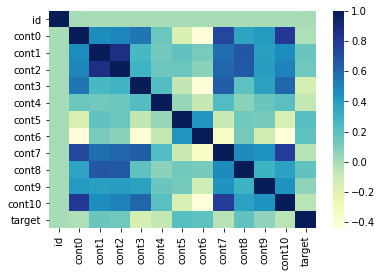

In [19]:
# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

<AxesSubplot:xlabel='target', ylabel='Count'>

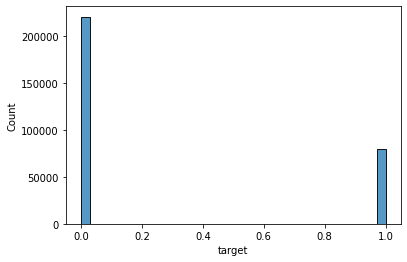

In [91]:
sns.histplot(y) #imbalanced, so i shouldnt use accuracy[[TN,FP], [FN,TP]], F1 identifies 1, & w/o wrong ones

### Removing  outliers for numerical values

In [20]:
data_num = data[num_cols]

In [21]:
data_num

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960
...,...,...,...,...,...,...,...,...,...,...,...
299995,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007
299996,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939
299997,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144
299998,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822


In [ ]:
# data_num[(np.abs(stats.zscore(data_num)) < 3).all(axis=1)]

In [ ]:
# data_num=data_num[(np.abs(stats.zscore(data_num)) < 3).all(axis=1)]

In [ ]:
# len(data_num)

### Categorical Sorting

In [ ]:
# data_cat.nunique()

In [ ]:
# len(data_cat)

In [ ]:
# test=data_cat['cat0'].value_counts()/300000*100
# test

In [ ]:
# test.index[0]

In [ ]:
# for i in range(len(test)):
#     if test[i] < 30.0:
#         print(test.index[i])

In [ ]:
# for i in range(len(test)):
#     if test[i] < 30.0:
#         data_cat['cat0'].replace(test.index[i],'other',inplace=True)
#         print(data_cat['cat0'].value_counts())


In [ ]:
# for cat in data_cat:
#     percentages=data_cat[cat].value_counts()/300000*100
#     print(cat)
#     print(percentages)

In [22]:
for cat in data_cat:
    percentages=data_cat[cat].value_counts()/300000*100
    print(cat)
    print(percentages)
    for i in range(len(percentages)):
        if percentages[i] < 5.0:
            data_cat[cat].replace(percentages.index[i],'other',inplace=True)


cat8
BM    14.126667
AE     8.147333
AX     7.376333
Y      6.954667
H      5.187000
        ...    
AQ     0.023000
T      0.022333
AC     0.019000
B      0.019000
AR     0.011000
Name: cat8, Length: 61, dtype: float64


/Users/macbookair/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


cat11
A    86.310667
B    13.689333
Name: cat11, dtype: float64
cat4
E    43.128333
F    25.559333
G    10.251333
D     9.306333
H     7.796000
J     1.435667
I     1.080333
K     0.493667
M     0.182333
C     0.168667
O     0.110000
B     0.100333
S     0.095000
T     0.071667
L     0.071333
Q     0.039000
P     0.033333
A     0.030667
N     0.027000
R     0.019667
Name: cat4, dtype: float64
cat10
DJ    10.528000
HK    10.332667
DP     7.893000
GS     5.539667
CR     4.794000
        ...    
CX     0.000333
FW     0.000333
GG     0.000333
BA     0.000333
GH     0.000333
Name: cat10, Length: 299, dtype: float64
cat17
D    82.375000
B     8.712000
C     8.441667
A     0.471333
Name: cat17, dtype: float64
cat9
A    67.315000
E    11.015333
C     7.786667
F     4.790333
J     2.994000
I     2.643667
N     1.595000
L     0.985667
R     0.287333
V     0.120000
B     0.093333
G     0.071333
Q     0.070333
D     0.063000
W     0.041667
O     0.040667
U     0.033667
X     0.033000
S     0.0200

In [23]:
for cat in data_cat:
    print(cat)
    print(data_cat[cat].value_counts()/300000*100)

cat8
other    58.208000
BM       14.126667
AE        8.147333
AX        7.376333
Y         6.954667
H         5.187000
Name: cat8, dtype: float64
cat11
A    86.310667
B    13.689333
Name: cat11, dtype: float64
cat4
E        43.128333
F        25.559333
G        10.251333
D         9.306333
H         7.796000
other     3.958667
Name: cat4, dtype: float64
cat10
other    65.706667
DJ       10.528000
HK       10.332667
DP        7.893000
GS        5.539667
Name: cat10, dtype: float64
cat17
D        82.375000
B         8.712000
C         8.441667
other     0.471333
Name: cat17, dtype: float64
cat9
A        67.315000
other    13.883000
E        11.015333
C         7.786667
Name: cat9, dtype: float64
cat6
A        62.632
C        23.809
other     8.032
E         5.527
Name: cat6, dtype: float64
cat5
BI       79.521000
AB       13.879667
other     6.599333
Name: cat5, dtype: float64
cat14
A    53.388667
B    46.611333
Name: cat14, dtype: float64
cat12
A    85.713
B    14.287
Name: cat12, dtype

In [24]:
data_cat.nunique()

cat8     6
cat11    2
cat4     6
cat10    5
cat17    4
cat9     4
cat6     4
cat5     3
cat14    2
cat12    2
cat0     2
cat13    2
cat7     7
cat18    4
cat2     5
cat16    3
cat1     6
cat15    3
cat3     4
dtype: int64

### One Hot Encode

In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe.fit(data_cat)
ohe.categories_

[array(['AE', 'AX', 'BM', 'H', 'Y', 'other'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'other'], dtype=object),
 array(['DJ', 'DP', 'GS', 'HK', 'other'], dtype=object),
 array(['B', 'C', 'D', 'other'], dtype=object),
 array(['A', 'C', 'E', 'other'], dtype=object),
 array(['A', 'C', 'E', 'other'], dtype=object),
 array(['AB', 'BI', 'other'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'other'], dtype=object),
 array(['AH', 'AN', 'AS', 'E', 'J', 'U', 'other'], dtype=object),
 array(['B', 'C', 'D', 'other'], dtype=object),
 array(['A', 'C', 'D', 'G', 'other'], dtype=object),
 array(['B', 'D', 'other'], dtype=object),
 array(['F', 'H', 'I', 'K', 'L', 'other'], dtype=object),
 array(['B', 'D', 'other'], dtype=object),
 array(['A', 'B', 'C', 'other'], dtype=object)]

In [26]:
new_cat=ohe.transform(data_cat).toarray()

In [29]:
new_cat.shape

(300000, 74)

In [30]:
new_cat_df = pd.DataFrame(new_cat)

## Merge Numerical & Cat

In [31]:
new_data = data_num.join(new_cat_df)

In [33]:
new_data.shape

(300000, 85)

## Split Data

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # explicit class import from module
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.3)

## Baseline Model Other

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn import set_config; set_config(display='diagram')

# pipe = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('classification', SVC())
# ])

# pipe.get_params()

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [93]:
from sklearn.model_selection import cross_val_score 

cv_results = cross_validate(model, X_train, y_train, cv=5)

In [94]:
cv_results

{'fit_time': array([3.995893  , 3.74751592, 4.14788294, 3.46524191, 3.77013397]),
 'score_time': array([0.01344776, 0.01123095, 0.01139283, 0.01572394, 0.01033568]),
 'test_score': array([0.83854762, 0.84159524, 0.8435    , 0.83992857, 0.83914286])}

In [39]:
cv_results['test_score'].mean()

0.8405571428571428

In [97]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred = model.predict(X_test)

In [105]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.89380712, 0.66402961])

In [43]:
mean_score = cross_val_score(model, X_train, y_train, scoring="f1", cv = 7).mean()

In [44]:
mean_score

0.6641753743942065

In [77]:
model.fit(new_data, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model w/o Corr features

In [48]:
new_data

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,64,65,66,67,68,69,70,71,72,73
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
299996,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
299997,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
299998,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
# corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
# corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
# corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
# corr_df

In [49]:
new_data.corr()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,64,65,66,67,68,69,70,71,72,73
cont0,1.000000,0.474046,0.494622,0.549246,0.155805,-0.169393,-0.436555,0.740377,0.367794,0.414758,...,0.076876,-0.014942,-0.046593,0.068380,-0.022499,-0.106453,-0.186160,0.120612,0.033230,0.127637
cont1,0.474046,1.000000,0.861623,0.256854,0.133988,0.185838,0.116296,0.581201,0.672587,0.393313,...,0.039752,0.000888,-0.025663,-0.065557,0.115854,-0.103453,-0.056162,-0.016548,0.056552,0.094822
cont2,0.494622,0.861623,1.000000,0.286822,0.158749,0.158240,0.066997,0.606447,0.662832,0.399063,...,0.028426,0.021921,-0.026141,-0.040379,0.082424,-0.087840,-0.082488,0.003940,0.045879,0.121268
cont3,0.549246,0.256854,0.286822,1.000000,0.222817,-0.068856,-0.429911,0.641923,0.188794,0.383062,...,0.212583,-0.049407,-0.037383,0.153870,-0.128151,-0.070566,-0.155781,0.111534,0.023345,0.090793
cont4,0.155805,0.133988,0.158749,0.222817,1.000000,0.037509,-0.081020,0.231526,0.064836,0.161150,...,0.130850,0.018749,-0.010555,0.158636,-0.149165,-0.035599,-0.081197,0.034687,0.006341,0.098040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.106453,-0.103453,-0.087840,-0.070566,-0.035599,0.024294,0.044005,-0.102990,-0.056721,-0.072014,...,-0.032672,0.019786,0.001991,-0.312187,-0.133088,1.000000,0.042935,-0.022979,-0.038486,-0.008682
70,-0.186160,-0.056162,-0.082488,-0.155781,-0.081197,0.037608,0.160774,-0.181744,-0.028174,-0.078687,...,0.030048,-0.023454,-0.004529,0.010849,-0.031016,0.042935,1.000000,-0.776798,-0.305449,-0.314286
71,0.120612,-0.016548,0.003940,0.111534,0.034687,-0.088099,-0.170531,0.122138,0.004784,0.010887,...,-0.013674,0.046253,-0.008781,-0.008526,0.019437,-0.022979,-0.776798,1.000000,-0.142868,-0.147001
72,0.033230,0.056552,0.045879,0.023345,0.006341,0.066486,0.051492,0.022526,-0.009487,0.006545,...,-0.044623,-0.039434,0.038739,-0.009163,0.027216,-0.038486,-0.305449,-0.142868,1.000000,-0.057803


In [50]:
data_drop= new_data.drop(columns='cont7')

In [51]:
data_drop= data_drop.drop(columns='cont10')

In [59]:
data_drop.shape

(300000, 83)

In [52]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # explicit class import from module

X_train, X_test, y_train, y_test = train_test_split(data_drop, y, test_size=0.3)

In [ ]:
# corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
# corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
# corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
# corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
# corr_df

In [60]:
cv_results = cross_validate(model, X_train, y_train, cv=5)


In [62]:
cv_results['test_score'].mean()

0.8405428571428573

In [63]:
cross_val_score(model, X_train, y_train, scoring="f1", cv = 7).mean()

/Users/macbookair/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


nan

## Whole Data Model

In [64]:
cross_validate(model, new_data, y, cv=5) 

{'fit_time': array([6.81820178, 4.78559899, 5.53385782, 4.67663431, 5.67986822]),
 'score_time': array([0.01902318, 0.01380014, 0.01348996, 0.01362085, 0.01412582]),
 'test_score': array([0.84015   , 0.84025   , 0.84013333, 0.83948333, 0.8398    ])}

In [65]:
cv_results = cross_validate(model, new_data, y, cv=5)

AttributeError: 'dict' object has no attribute 'mean'

In [66]:
cross_val_score(model, new_data, y, scoring="f1", cv = 7).mean()

0.6635545897576955

## import xgboost as xgb

In [69]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

/Users/macbookair/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8371444444444445

In [71]:
model.score(X_test,y_test)

TypeError: score() got an unexpected keyword argument 'score'

In [68]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 3.3 MB/s eta 0:00:01     |█████████▊                      | 358 kB 3.3 MB/s eta 0:00:01


In [72]:
data_test = pd.read_csv('raw_data/test.csv')

## SGDClassifier

In [83]:
from sklearn.linear_model import SGDClassifier

In [85]:
model=SGDClassifier()

In [86]:
cv_result=cross_validate(model, new_data, y, cv=5) 

In [88]:
cv_result['test_score'].mean()

0.83468

In [89]:
cross_val_score(model, new_data, y, scoring="f1", cv = 7).mean()

0.6628201118959469

## Test Set

In [ ]:
test_enc=ohe.transform(data_test[cat_cols]).toarray()
data_test[cat_cols]=test_enc
model.predict(test)